# Prices and Popularity of Products on Amazon

## Python libraries

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [64]:
data = pd.read_csv('Amazon-Products.csv')
data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [65]:
data.shape

(551585, 10)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


## Handling Missing Data

In [67]:
(data.isnull().sum()/len(data))*100

Unnamed: 0         0.000000
name               0.000000
main_category      0.000000
sub_category       0.000000
image              0.000000
link               0.000000
ratings           31.870700
no_of_ratings     31.870700
discount_price    11.088590
actual_price       3.229421
dtype: float64

In [68]:
null_columns = list((((data.isnull().sum()/len(data))*100)[((data.isnull().sum()/len(data))*100) > 0]).index)
null_columns

['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [69]:
null_data = data.copy()

In [70]:
null_data.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price'],
      dtype='object')

In [71]:
for i in null_data.columns:
    percentage_unique_values = (len(null_data[i].unique())/len(null_data))*100
    print(f'Column {i}: {round(percentage_unique_values,4)} % unique values')
    print('---------------------------')


Column Unnamed: 0: 3.4809 % unique values
---------------------------
Column name: 71.8312 % unique values
---------------------------
Column main_category: 0.0036 % unique values
---------------------------
Column sub_category: 0.0203 % unique values
---------------------------
Column image: 83.8337 % unique values
---------------------------
Column link: 100.0 % unique values
---------------------------
Column ratings: 0.0091 % unique values
---------------------------
Column no_of_ratings: 1.5126 % unique values
---------------------------
Column discount_price: 4.9878 % unique values
---------------------------
Column actual_price: 4.2008 % unique values
---------------------------


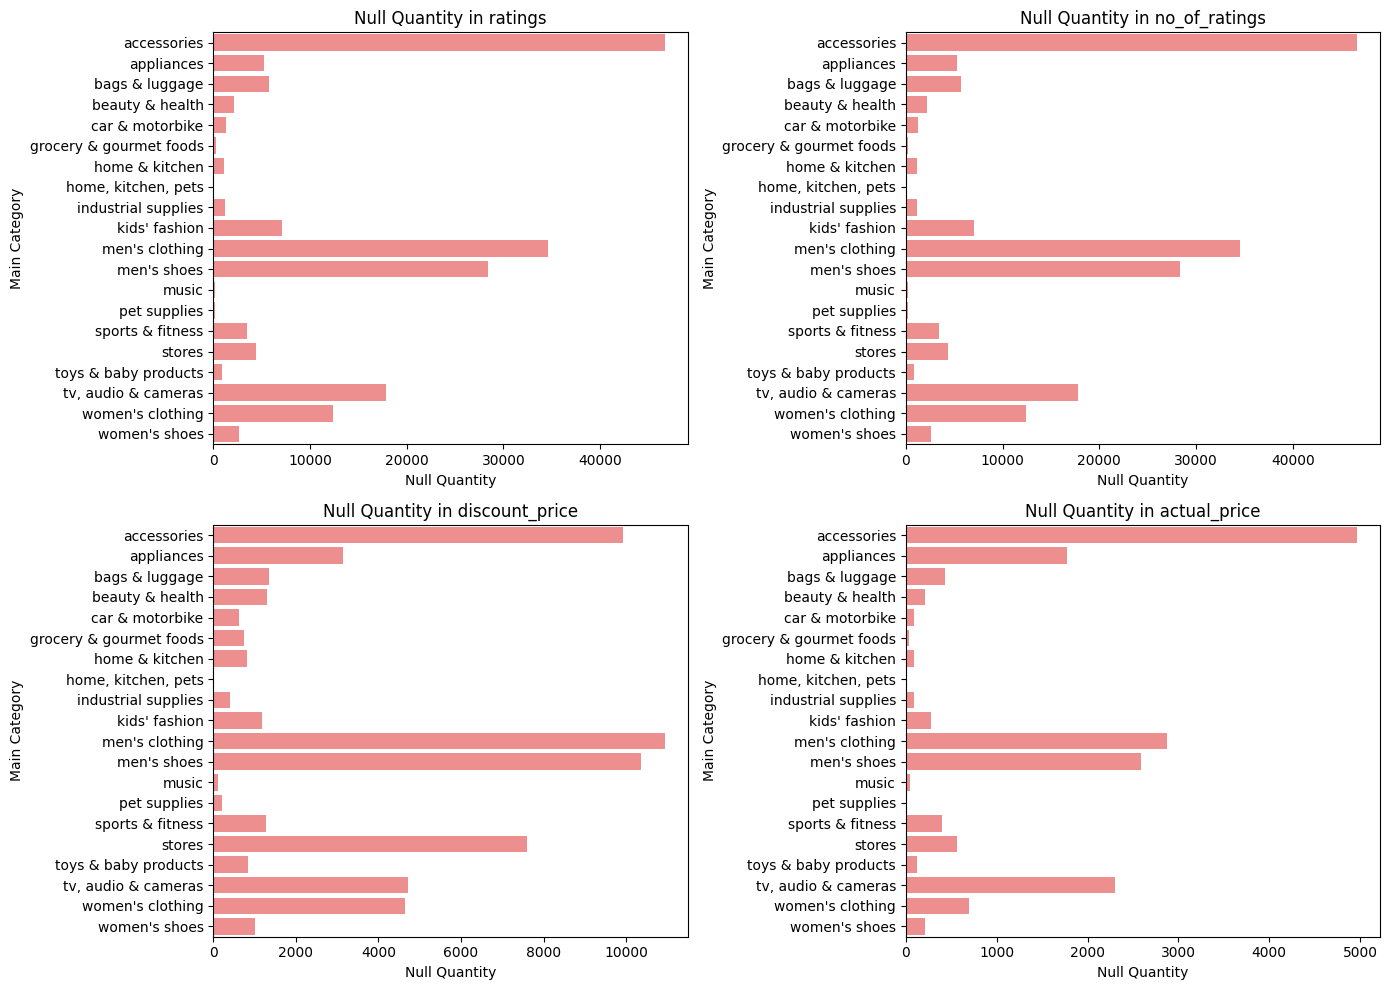

In [72]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_byCategory = null_data.groupby('main_category')[col].apply(lambda x: x.isnull().sum())
    df_null_byCategory = pd.DataFrame(null_counts_byCategory).rename(columns={col: 'Null Quantity'})
    
    # Create the bar plot
    sns.barplot(data=df_null_byCategory, y=df_null_byCategory.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Main Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

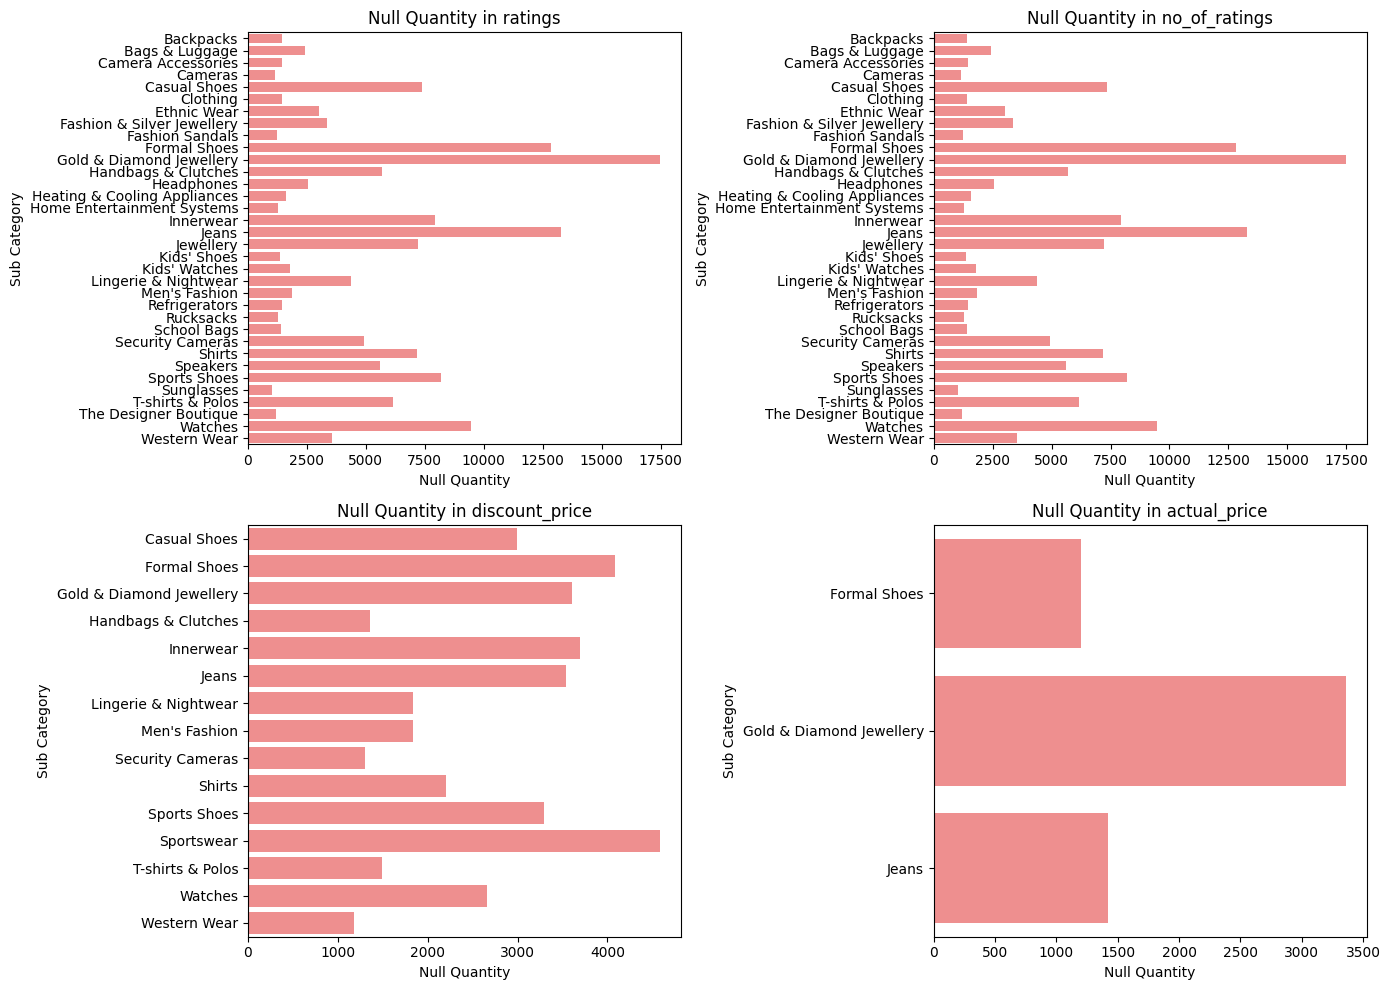

In [73]:
# Configuration of the grid for the plots (2x2)
n_rows = 2
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 10))

# Iterate over the null columns and plot them
for idx, col in enumerate(null_columns):
    row = idx // n_cols
    col_idx = idx % n_cols
    ax = axes[row, col_idx]
    
    # Calculate the number of null values by category
    null_counts_SubCategory = null_data.groupby('sub_category')[col].apply(lambda x: x.isnull().sum())
    df_nullSubCategory = pd.DataFrame(null_counts_SubCategory).rename(columns={col: 'Null Quantity'})
    df_nullSubCategory_filltered = df_nullSubCategory[df_nullSubCategory['Null Quantity'] > 1000]
    
    # Create the bar plot
    sns.barplot(data=df_nullSubCategory_filltered, y=df_nullSubCategory_filltered.index, x='Null Quantity', alpha=0.5, color='r', ax=ax)
    ax.set_title(f'Null Quantity in {col}')
    ax.set_xlabel('Null Quantity')
    ax.set_ylabel('Sub Category')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()

## Dropping Missing Data 

In [74]:
cleaned_data = null_data.copy()


In [75]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Unnamed: 0      551585 non-null  int64 
 1   name            551585 non-null  object
 2   main_category   551585 non-null  object
 3   sub_category    551585 non-null  object
 4   image           551585 non-null  object
 5   link            551585 non-null  object
 6   ratings         375791 non-null  object
 7   no_of_ratings   375791 non-null  object
 8   discount_price  490422 non-null  object
 9   actual_price    533772 non-null  object
dtypes: int64(1), object(9)
memory usage: 42.1+ MB


In [76]:
# Attempt to convert each value to a numeric type
non_numeric_values = cleaned_data['no_of_ratings'].apply(pd.to_numeric, errors='coerce')

# Select values that couldn't be converted correctly
text_values = cleaned_data['no_of_ratings'][non_numeric_values.isnull()]

# Print the values that are truly text or object
print("Text or object values in 'no_of_ratings' column:")
print(text_values.unique())

Text or object values in 'no_of_ratings' column:
['2,255' '2,948' '1,206' ... '3,329' '7,141' '4,406']


In [77]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


## Handling Numeric Columns with Object Dtype

In [78]:
transforming_to_numeric = cleaned_data.copy()

In [79]:
numeric_columns = ['ratings', 'no_of_ratings', 'discount_price', 'actual_price']

In [80]:
# Convert the specified columns to numeric, handling errors by coercing invalid parsing to NaN
for col in numeric_columns:
    transforming_to_numeric[col] = pd.to_numeric(transforming_to_numeric[col], errors='coerce')

transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         369558 non-null  float64
 7   no_of_ratings   339029 non-null  float64
 8   discount_price  0 non-null       float64
 9   actual_price    0 non-null       float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.1+ MB


In [81]:
cleaned_data.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"


In [82]:
first_2_numeric_columns = ['ratings', 'no_of_ratings']
for col in first_2_numeric_columns:
    # Convert the column to numeric, coercing errors to NaN
    numeric_values = pd.to_numeric(cleaned_data[col], errors='coerce')
    
    # Select non-numeric values
    non_numeric_values = cleaned_data[col][numeric_values.isnull()]
    
    # Print non-numeric values
    print(f"The column {col} has the following non-numeric values:")
    print(non_numeric_values.unique())

The column ratings has the following non-numeric values:
[nan 'Get' 'FREE' '₹68.99' '₹65' '₹70' '₹100' '₹99' '₹2.99']
The column no_of_ratings has the following non-numeric values:
['2,255' '2,948' '1,206' ... '3,329' '7,141' '4,406']


In [83]:
# List of non-numeric values
ratings_no_numeric_values = ['Get', 'FREE', '₹65', '₹70', '₹100', '₹99', '₹2.99']

# Filter the "ratings" column to select only values in ratings_no_numeric_values
filtered_ratings = cleaned_data[cleaned_data['ratings'].isin(ratings_no_numeric_values)]

# Count how many times each value appears and calculate percentage
percenatage_value_counts = ((filtered_ratings['ratings'].value_counts()) / len(cleaned_data)) * 100

# Print the result
print("Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:")
print(percenatage_value_counts)

Percentage of each value from 'ratings_no_numeric_values' in the 'ratings' column:
ratings
Get      0.879647
FREE     0.246018
₹99      0.002538
₹70      0.000906
₹2.99    0.000363
₹65      0.000181
₹100     0.000181
Name: count, dtype: float64


In [84]:
transforming_to_numeric = cleaned_data.copy()

In [85]:
transforming_to_numeric['ratings'] = pd.to_numeric(transforming_to_numeric['ratings'], errors='coerce')
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         369558 non-null  float64
 7   no_of_ratings   375791 non-null  object 
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 42.1+ MB


In [86]:
mediana_ratings = transforming_to_numeric['ratings'].median()
transforming_to_numeric['ratings'] = transforming_to_numeric['ratings'].fillna(mediana_ratings)

transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         551585 non-null  float64
 7   no_of_ratings   375791 non-null  object 
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 42.1+ MB


In [87]:
# Attempt to convert each value to a numeric type
non_numeric_values = transforming_to_numeric['no_of_ratings'].apply(pd.to_numeric, errors='coerce')

# Select values that couldn't be converted correctly
text_values = transforming_to_numeric['no_of_ratings'][non_numeric_values.isnull()]

# Print the values that are truly text or object
print("Text or object values in 'no_of_ratings' column:")
print(text_values.unique())

Text or object values in 'no_of_ratings' column:
['2,255' '2,948' '1,206' ... '3,329' '7,141' '4,406']


In [88]:
transforming_to_numeric["no_of_ratings"] = transforming_to_numeric["no_of_ratings"].str.replace(',', '')
transforming_to_numeric['no_of_ratings'] = pd.to_numeric(transforming_to_numeric['no_of_ratings'], errors='coerce')
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         551585 non-null  float64
 7   no_of_ratings   369558 non-null  float64
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 42.1+ MB


In [89]:

media_no_ratings = transforming_to_numeric['no_of_ratings'].mean()
transforming_to_numeric['no_of_ratings'] = transforming_to_numeric['no_of_ratings'].fillna(media_no_ratings)
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         551585 non-null  float64
 7   no_of_ratings   551585 non-null  float64
 8   discount_price  490422 non-null  object 
 9   actual_price    533772 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 42.1+ MB


In [90]:
# Removing the ₹ sign
transforming_to_numeric["discount_price"] = transforming_to_numeric["discount_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.split(" ", expand = True).get(0).str.split("₹", expand = True).get(1)

In [91]:
# Change commas to dots and change the type to float
transforming_to_numeric['discount_price'] = transforming_to_numeric["discount_price"].str.replace(',', '').astype(float)
transforming_to_numeric["actual_price"] = transforming_to_numeric["actual_price"].str.replace(',', '').astype(float)

In [92]:
transforming_to_numeric['discount_price'] = transforming_to_numeric['discount_price'].fillna(0)
transforming_to_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      551585 non-null  int64  
 1   name            551585 non-null  object 
 2   main_category   551585 non-null  object 
 3   sub_category    551585 non-null  object 
 4   image           551585 non-null  object 
 5   link            551585 non-null  object 
 6   ratings         551585 non-null  float64
 7   no_of_ratings   551585 non-null  float64
 8   discount_price  551585 non-null  float64
 9   actual_price    533772 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 42.1+ MB


In [93]:
transforming_to_numeric.dropna(inplace=True)
transforming_to_numeric.info()


<class 'pandas.core.frame.DataFrame'>
Index: 533772 entries, 0 to 551584
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      533772 non-null  int64  
 1   name            533772 non-null  object 
 2   main_category   533772 non-null  object 
 3   sub_category    533772 non-null  object 
 4   image           533772 non-null  object 
 5   link            533772 non-null  object 
 6   ratings         533772 non-null  float64
 7   no_of_ratings   533772 non-null  float64
 8   discount_price  533772 non-null  float64
 9   actual_price    533772 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 44.8+ MB


## Exploratory Data Analisys

In [94]:
df = transforming_to_numeric.copy()

In [95]:
df['name'][0:10]

0    Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...
1    LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...
2    LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...
3    LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...
4    Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...
5    Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...
6    Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...
7    Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...
8    Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...
9    Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...
Name: name, dtype: object

In [96]:
# Function to extract manufacturer
def extract_manufacturer(name):
    words = name.split(' ')
    if words[0] in ['The', 'Var']:
        return ' '.join(words[:2])
    return words[0]

# Apply the function to create the manufacturer column
df['manufacturer'] = df['name'].apply(extract_manufacturer)
df.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,LG


In [97]:
print(f'Number of Manufacturer companies: {len(df['manufacturer'].unique())}')


Number of Manufacturer companies: 49207


In [98]:
# Make column with discount net value
df['discount_value'] = df['actual_price'] - df['discount_price']

In [99]:
# Make column with discount and discounting percent 
df['discounting_percent'] = 1 - df['discount_price']/df['actual_price']

In [100]:
df.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,Lloyd,25991.0,0.440600
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,LG,29500.0,0.388209
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,LG,27500.0,0.443620


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533772 entries, 0 to 551584
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           533772 non-null  int64  
 1   name                 533772 non-null  object 
 2   main_category        533772 non-null  object 
 3   sub_category         533772 non-null  object 
 4   image                533772 non-null  object 
 5   link                 533772 non-null  object 
 6   ratings              533772 non-null  float64
 7   no_of_ratings        533772 non-null  float64
 8   discount_price       533772 non-null  float64
 9   actual_price         533772 non-null  float64
 10  manufacturer         533772 non-null  object 
 11  discount_value       533772 non-null  float64
 12  discounting_percent  533769 non-null  float64
dtypes: float64(6), int64(1), object(6)
memory usage: 57.0+ MB


In [102]:
df[["actual_price", 'manufacturer']].groupby("manufacturer").mean().round(2).sort_values(by = "actual_price", ascending = False)

,actual_price
manufacturer,
Marutivilla,3.300001e+09
SMBI,6.000000e+05
Glycol,5.000000e+05
Bundle:,2.319640e+05
DENON,2.129000e+05
...,...
"Sprite,",2.000000e+01
BRU,1.000000e+01
Bingo!,1.000000e+01


In [103]:
# Let us check the manufactures according to their prices
df.groupby("manufacturer")['actual_price'].mean().sort_values( ascending = False)

manufacturer
Marutivilla    3.300001e+09
SMBI           6.000000e+05
Glycol         5.000000e+05
Bundle:        2.319640e+05
DENON          2.129000e+05
                   ...     
Sprite,        2.000000e+01
BRU            1.000000e+01
Bingo!         1.000000e+01
Learning       0.000000e+00
The Sugar      0.000000e+00
Name: actual_price, Length: 49207, dtype: float64

In [104]:
# Detail of the maximum price row
df[df["actual_price"] == df["actual_price"].max()]

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
194625,853,"Marutivilla Insect Killer, Mosquito Killer Lig...",home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09,Marutivilla,9.899999e+09,1.0


In [105]:
# Detail of the minimum price row
df[df["discount_value"] == df["discount_value"].min()]

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
253507,119,Learning The Basics Of Home Theater,"tv, audio & cameras",Home Audio & Theater,https://m.media-amazon.com/images/I/81TMOeVPAz...,https://www.amazon.in/Learning-Basics-Theater-...,3.8,21.0,0.0,0.0,Learning,0.0,NaN
374235,12,The Sugar Men,stores,Men's Fashion,https://m.media-amazon.com/images/I/81goW+aNWW...,https://www.amazon.in/Sugar-Men-Ray-Kingfisher...,4.3,4485.0,0.0,0.0,The Sugar,0.0,NaN
443775,5136,Learning The Basics Of Home Theater,"tv, audio & cameras",Speakers,https://m.media-amazon.com/images/I/81TMOeVPAz...,https://www.amazon.in/Learning-Basics-Theater-...,3.8,21.0,0.0,0.0,Learning,0.0,NaN


In [106]:
# Replace 'Van' with 'Van Heusen' in the 'manufacturer' column
df['manufacturer'] = df['manufacturer'].replace('Van', 'Van Heusen')
df['manufacturer'] = df['manufacturer'].replace('PC', 'PC Jeweller')

In [107]:
# Let us check the common manufacture
values = df["manufacturer"].value_counts().keys().tolist()[:10]
counts = df["manufacturer"].value_counts().tolist()[:10]

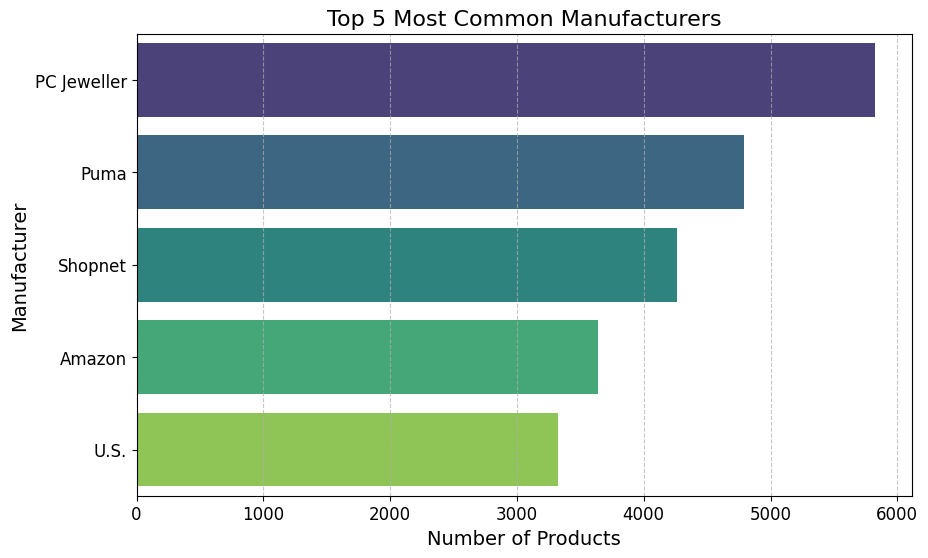

In [108]:
top_n = 5  # Change from 10 to 5
manufacturer_counts = df['manufacturer'].value_counts().head(top_n)
values = manufacturer_counts.index
counts = manufacturer_counts.values

plt.figure(figsize=(10,6))
sns.barplot(x=counts, y=values, hue=values, palette="viridis")

# Adding labels and title
plt.title('Top 5 Most Common Manufacturers', fontsize=16)
plt.xlabel('Number of Products', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [109]:
# Creating the dataframe of top 10 manufacturer
# Get the top 10 manufacturers
top_10_manufacturers = df['manufacturer'].value_counts().index[:10]

# Creating the DataFrame of top 10 manufacturers
df_top_10_manufacturers = df[df['manufacturer'].isin(top_10_manufacturers)]
df_top_10_manufacturers.head(3)

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,manufacturer,discount_value,discounting_percent
65,65,"Amazon Basics 1 Ton, 5 Star, Wi-Fi Enabled Sma...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.6,88.0,28990.0,49089.0,Amazon,20099.0,0.409440
83,83,"Amazon Basics 1.5 Ton, 5 Star, Wi-Fi Enabled S...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51s3yrWntM...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.4,39.0,34990.0,56179.0,Amazon,21189.0,0.377169
112,112,Amazon Basics 1 Ton 4 Star Fixed Speed Window ...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/91BcgKPL5x...,https://www.amazon.in/AmazonBasics-1-5-Ton-Air...,3.5,14.0,25490.0,33990.0,Amazon,8500.0,0.250074


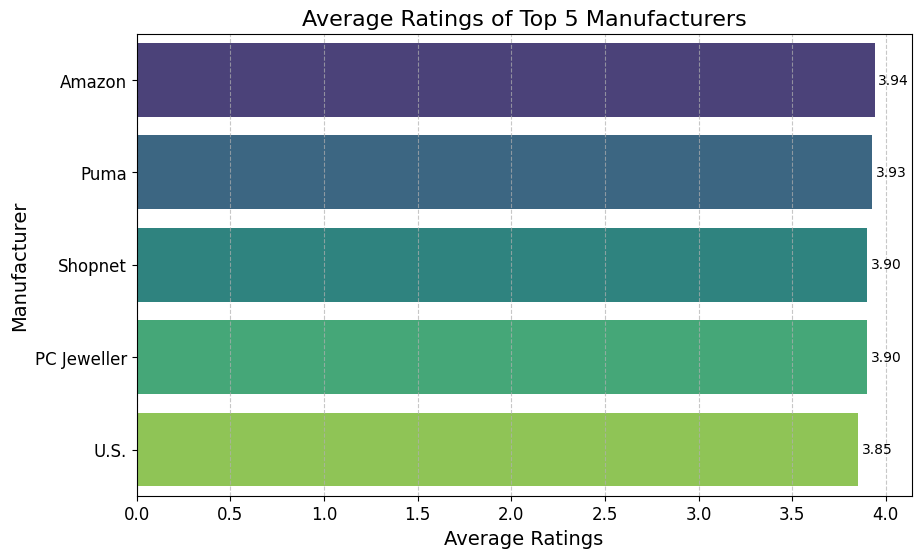

In [110]:
# Determine the top 5 manufacturers by their total ratings
top_5_manufacturers = df.groupby("manufacturer")["ratings"].sum().nlargest(5).index

# Creating the DataFrame of top 5 manufacturers
df_top_5_manufacturers = df[df['manufacturer'].isin(top_5_manufacturers)]

# Calculate the average ratings for each manufacturer and sort them
average_ratings = df_top_5_manufacturers.groupby("manufacturer")["ratings"].mean().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
average_ratings = average_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
barplot = sns.barplot(x="ratings", y="manufacturer", data=average_ratings, hue='manufacturer', palette="viridis")

# Add the value labels on the bars with a slight offset
for index, value in enumerate(average_ratings["ratings"]):
    plt.text(value + 0.02, index, f'{value:.2f}', color='black', ha="left", va="center")

# Add labels and title
plt.title('Average Ratings of Top 5 Manufacturers', fontsize=16)
plt.xlabel('Average Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***The top 10 most popular manufacturers***

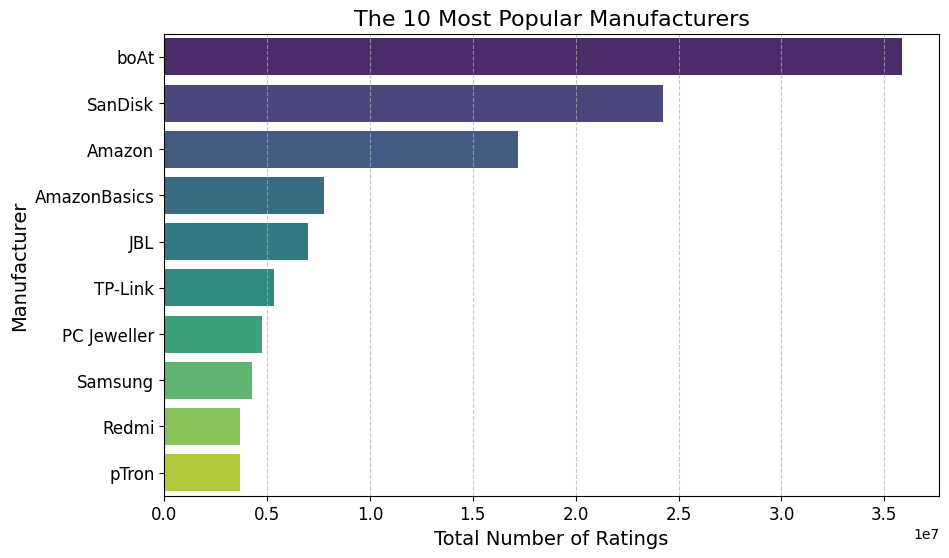

In [111]:
# Calculate the total number of ratings for each manufacturer and sort them
total_no_of_ratings = df.groupby("manufacturer")["no_of_ratings"].sum().sort_values(ascending=False).head(10)

# Reset the index to convert the Series to a DataFrame for plotting
total_no_of_ratings = total_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="manufacturer", data=total_no_of_ratings, hue='manufacturer', palette="viridis")

# Add labels and title
plt.title('The 10 Most Popular Manufacturers', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Manufacturer', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #1***

In the graph above, we observe that the manufacturer boAt is the most popular, with over 35 million reviews. In contrast, within the top 10 manufacturers, pTron holds a significantly lower position, with approximately 4 million reviews. Next, we will conduct a detailed and stratified analysis of these manufacturers to better understand the differences in popularity and other relevant factors.

In [112]:
# Calculate the total number of ratings for each manufacturer and sort them
total_no_of_ratings = df.groupby("manufacturer")["no_of_ratings"].sum().sort_values(ascending=False).head(10)

# Get the names of the top 10 manufacturers
top_10_manufacturers = total_no_of_ratings.index

# Filter the original dataframe to include only the top 10 manufacturers
df_10_most_popular = df[df["manufacturer"].isin(top_10_manufacturers)]

# Display the new dataframe
df_10_most_popular.shape


(12074, 13)

In [113]:
df_10_most_popular['manufacturer'].unique()

array(['Samsung', 'AmazonBasics', 'Amazon', 'TP-Link', 'pTron', 'Redmi',
       'boAt', 'SanDisk', 'JBL', 'PC Jeweller'], dtype=object)

In [114]:
df_boAt = df[df['manufacturer'] == 'boAt']
df_boAt.shape

(529, 13)

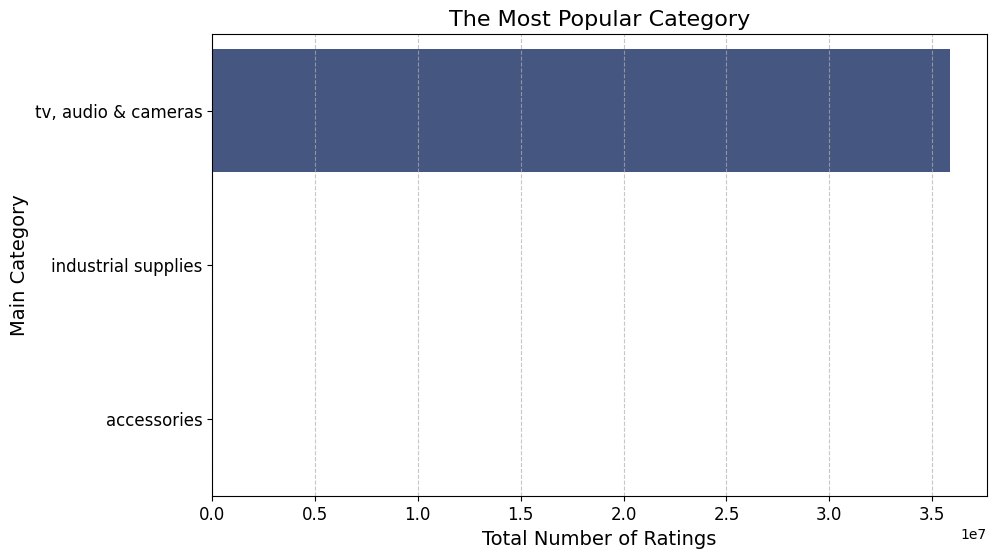

In [115]:
# Calculate the total number of ratings for each main category and sort them
total_no_of_ratings = df_boAt.groupby("main_category")["no_of_ratings"].sum().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
total_no_of_ratings = total_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="no_of_ratings", y="main_category", data=total_no_of_ratings, hue='main_category', palette="viridis")

# Add labels and title
plt.title('The Most Popular Category', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [116]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'manufacturer', 'discount_value', 'discounting_percent'],
      dtype='object')

In [117]:
total_no_of_ratings

,main_category,no_of_ratings
0,"tv, audio & cameras",3.587094e+07
1,industrial supplies,5.480000e+02
2,accessories,2.400000e+02


In [118]:
df_pTron = df[df['manufacturer'] == 'pTron']
df_pTron.shape

(137, 13)

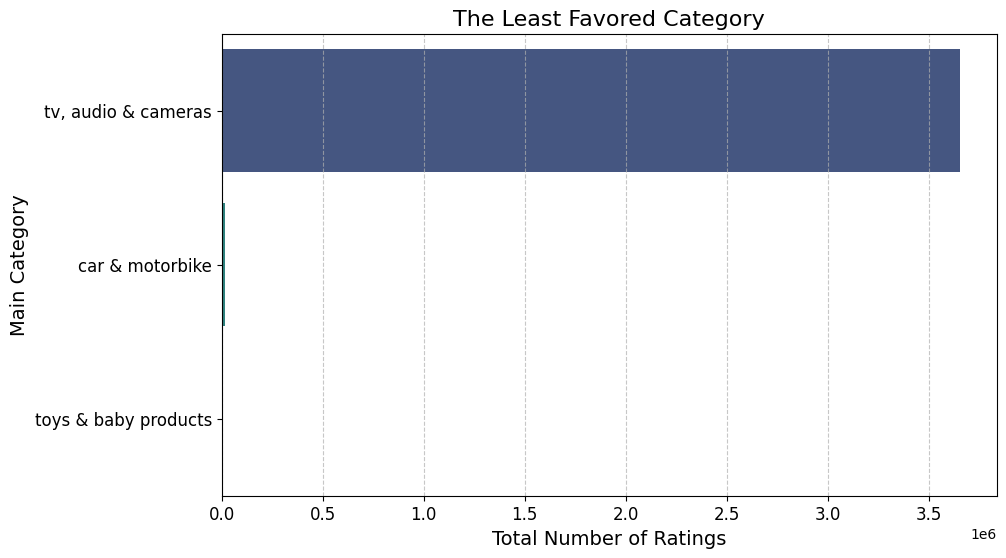

In [119]:
# Calculate the total number of ratings for each main category and sort them
total_no_of_ratings = df_pTron.groupby("main_category")["no_of_ratings"].sum().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
total_no_of_ratings = total_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="no_of_ratings", y="main_category", data=total_no_of_ratings, hue='main_category', palette="viridis")

# Add labels and title
plt.title('The Least Favored Category', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Main Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #2*** 
The previous two graphs were generated considering only the manufacturers boAt (the most popular) and pTron (the least popular). As observed, both manufacturers have 'TV, Audio & Cameras' as their main category.

In [120]:
total_no_of_ratings

,main_category,no_of_ratings
0,"tv, audio & cameras",3.653119e+06
1,car & motorbike,1.591000e+04
2,toys & baby products,2.190000e+02


In [121]:
df_boAt_tv_audio_cameras = df_boAt[df_boAt['main_category'] == 'tv, audio & cameras']
df_boAt_tv_audio_cameras.shape

(526, 13)

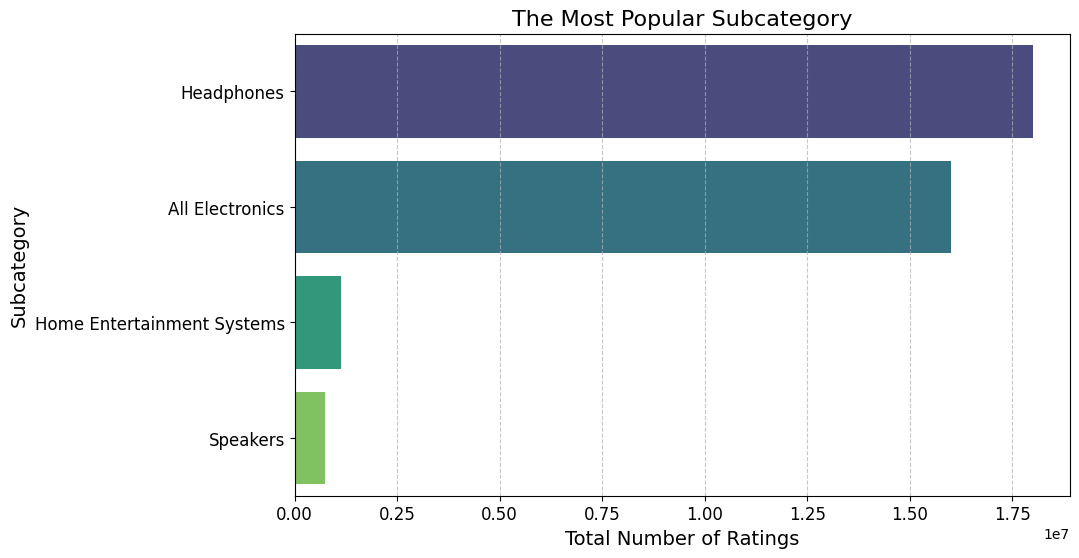

In [122]:
# Calculate the total number of ratings for each subcategory and sort them
total_no_of_ratings = df_boAt_tv_audio_cameras.groupby("sub_category")["no_of_ratings"].sum().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
total_no_of_ratings = total_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="sub_category", data=total_no_of_ratings, hue='sub_category', palette="viridis")

# Add labels and title
plt.title('The Most Popular Subcategory', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [123]:
df_pTron_tv_audio_cameras = df_pTron[df_pTron['main_category']== 'tv, audio & cameras']
df_pTron_tv_audio_cameras.shape

(135, 13)

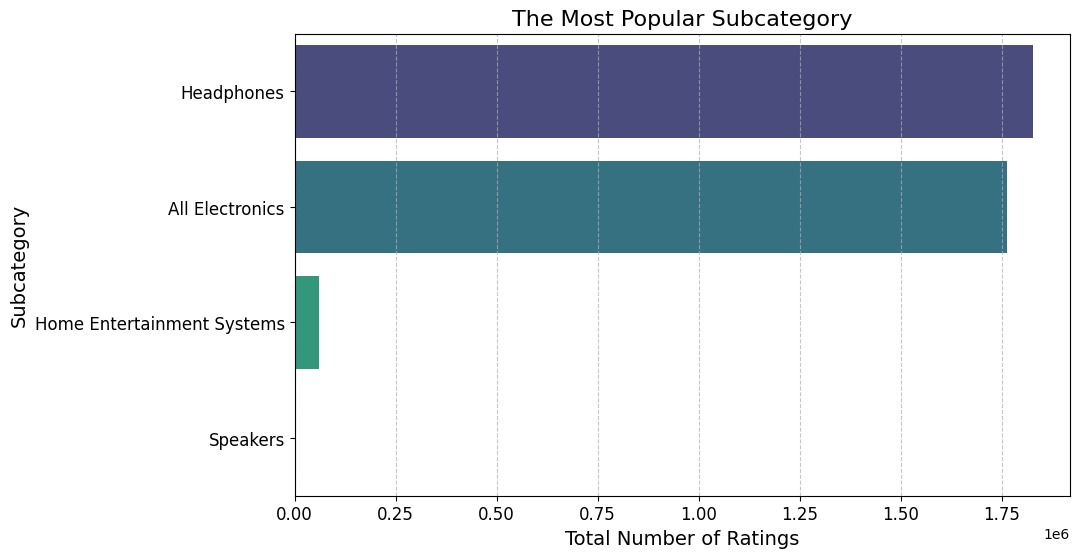

In [124]:
# Calculate the total number of ratings for each subcategory and sort them
total_no_of_ratings = df_pTron_tv_audio_cameras.groupby("sub_category")["no_of_ratings"].sum().sort_values(ascending=False)

# Reset the index to convert the Series to a DataFrame for plotting
total_no_of_ratings = total_no_of_ratings.reset_index()

# Create the bar plot
plt.figure(figsize=(10,6))
sns.barplot(x="no_of_ratings", y="sub_category", data=total_no_of_ratings, hue='sub_category', palette="viridis")

# Add labels and title
plt.title('The Most Popular Subcategory', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Subcategory', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #3***
As seen in the previous two graphs, the subcategories for boAt (the most popular) and pTron (the least popular) are analyzed. In this case, both manufacturers share the main subcategories, which are Headphones and All Electronics.

In [125]:
df_boAt_tv_audio_cameras_headphones = df_boAt_tv_audio_cameras[df_boAt_tv_audio_cameras['sub_category']=='Headphones']
df_boAt_tv_audio_cameras_headphones.shape

(195, 13)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10944\2577544192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_boAt_tv_audio_cameras_headphones['short_name'] = df_boAt_tv_audio_cameras_headphones['name'].apply(lambda x: ' '.join(x.split()[:3]))


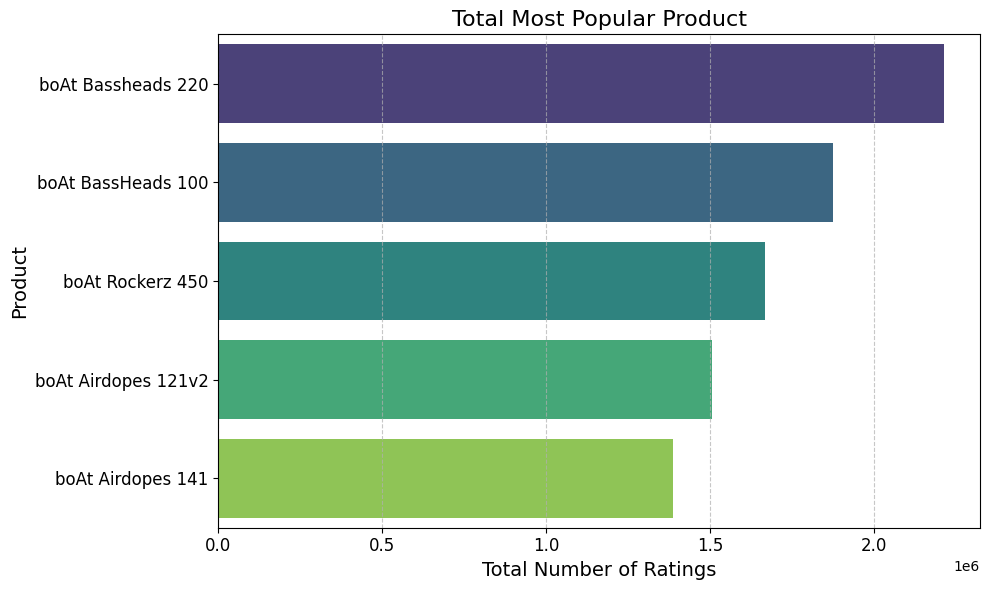

In [126]:
# Shorten the product names
df_boAt_tv_audio_cameras_headphones['short_name'] = df_boAt_tv_audio_cameras_headphones['name'].apply(lambda x: ' '.join(x.split()[:3]))

# Calculate the total number of ratings for each product and sort them
total_ratings = df_boAt_tv_audio_cameras_headphones.groupby("short_name")["no_of_ratings"].sum().sort_values(ascending=False)

# Select only the top 5 products
top_5_products = total_ratings.head(5)

# Reset the index to convert the Series to a DataFrame for plotting
top_5_products = top_5_products.reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="no_of_ratings", y="short_name", data=top_5_products, hue='short_name', palette="viridis")

# Add labels and title
plt.title('Total Most Popular Product', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

In [127]:
total_no_of_ratings

,sub_category,no_of_ratings
0,Headphones,1.826239e+06
1,All Electronics,1.762843e+06
2,Home Entertainment Systems,5.959300e+04
3,Speakers,4.444000e+03


In [128]:
df_pTron_tv_audio_cameras_headphones = df_pTron_tv_audio_cameras[df_pTron_tv_audio_cameras['sub_category']=='Headphones']
df_pTron_tv_audio_cameras_headphones.shape

(50, 13)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10944\1369813458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pTron_tv_audio_cameras_headphones['short_name'] = df_pTron_tv_audio_cameras_headphones['name'].apply(lambda x: ' '.join(x.split()[:3]))


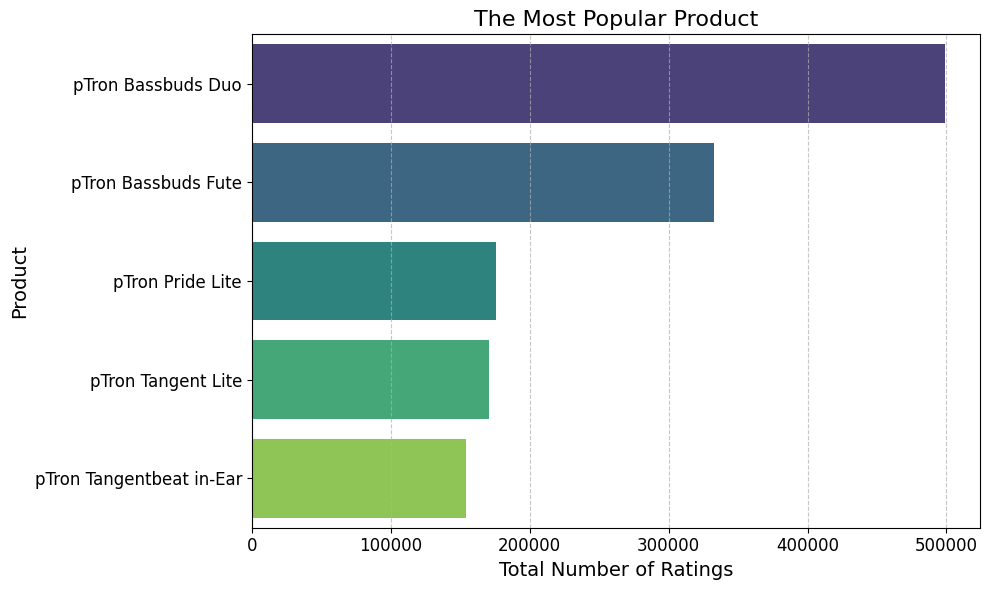

In [129]:
# Shorten the product names
df_pTron_tv_audio_cameras_headphones['short_name'] = df_pTron_tv_audio_cameras_headphones['name'].apply(lambda x: ' '.join(x.split()[:3]))

# Calculate the total number of ratings for each product and sort them
total_ratings = df_pTron_tv_audio_cameras_headphones.groupby("short_name")["no_of_ratings"].sum().sort_values(ascending=False)

# Select only the top 5 products
top_5_products = total_ratings.head(5)

# Reset the index to convert the Series to a DataFrame for plotting
top_5_products = top_5_products.reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="no_of_ratings", y="short_name", data=top_5_products, hue='short_name', palette="viridis")

# Add labels and title
plt.title('The Most Popular Product', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=14)
plt.ylabel('Product', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

### ***Insight #4***
The previous two graphs analyze the most popular products from the manufacturers boAt and pTron, respectively. In both cases, the most popular product for each manufacturer is headphones.

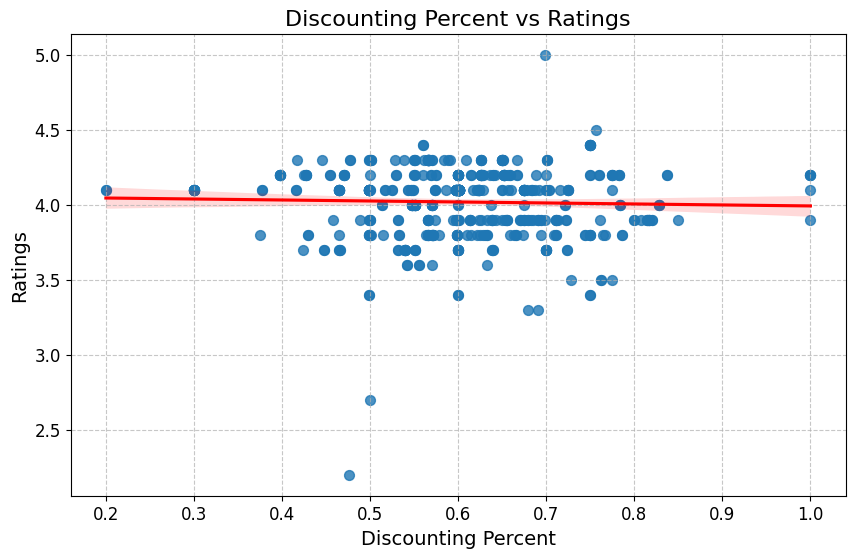

In [130]:
# Adjust the size of the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression line
scatterplot = sns.regplot(data=df_boAt, x='discounting_percent', y='ratings', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Discounting Percent vs Ratings', fontsize=16)
plt.xlabel('Discounting Percent', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

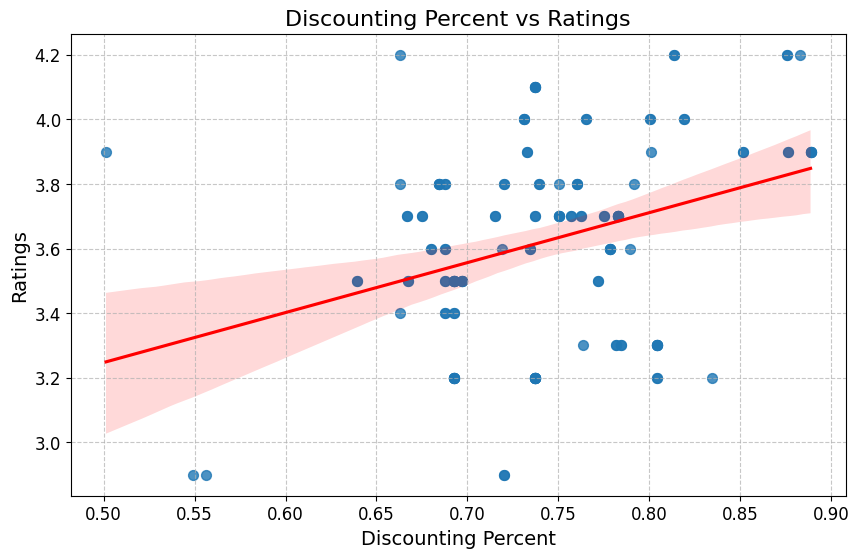

In [131]:
# Adjust the size of the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression line
scatterplot = sns.regplot(data=df_pTron, x='discounting_percent', y='ratings', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Discounting Percent vs Ratings', fontsize=16)
plt.xlabel('Discounting Percent', fontsize=14)
plt.ylabel('Ratings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #5***
In the previous two graphs, we observe a comparison between the discount percentage (x-axis) and the rating (y-axis). As we can see, boAt maintains consistent quality for discounted products, as all of them have the same rating. In contrast, pTron shows variable quality, with its ratings increasing as the discount percentage rises.

In [132]:
df.columns

Index(['Unnamed: 0', 'name', 'main_category', 'sub_category', 'image', 'link',
       'ratings', 'no_of_ratings', 'discount_price', 'actual_price',
       'manufacturer', 'discount_value', 'discounting_percent'],
      dtype='object')

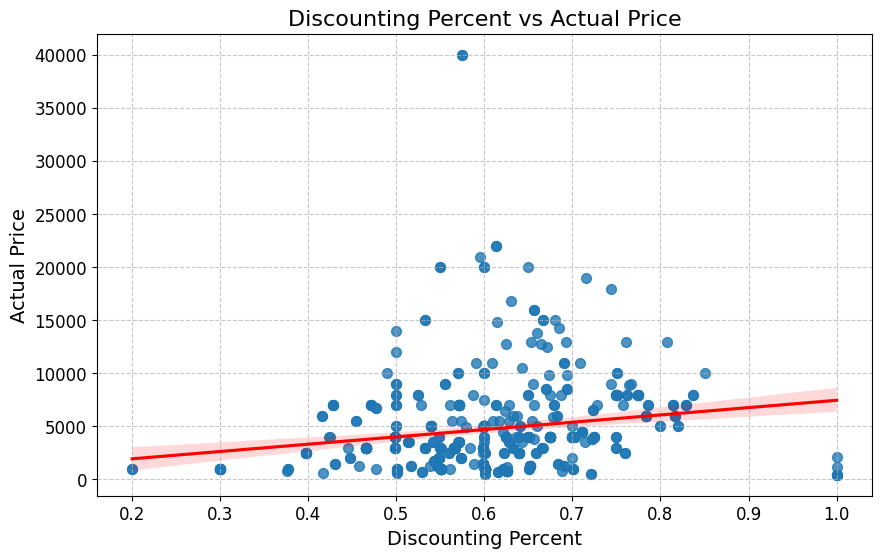

In [135]:
# Adjust the size of the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression line
scatterplot = sns.regplot(data=df_boAt, x='discounting_percent', y='actual_price', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Discounting Percent vs Actual Price', fontsize=16)
plt.xlabel('Discounting Percent', fontsize=14)
plt.ylabel('Actual Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

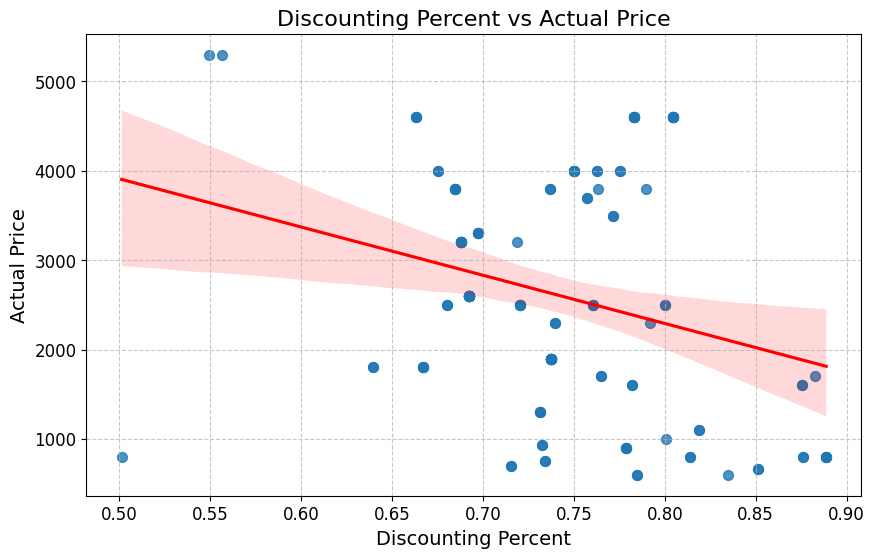

In [136]:
# Adjust the size of the figure
plt.figure(figsize=(10, 6))

# Create the scatter plot with regression line
scatterplot = sns.regplot(data=df_pTron, x='discounting_percent', y='actual_price', scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Add title and labels
plt.title('Discounting Percent vs Actual Price', fontsize=16)
plt.xlabel('Discounting Percent', fontsize=14)
plt.ylabel('Actual Price', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

### ***Insight #6***
The previous two graphs analyze the discount percentage versus the current price for boAt and pTron, respectively. As we can see, both brands employ different discount strategies.

## ***Summary***

1. Manufacturer Popularity:

boAt is the most popular manufacturer with over 35 million reviews, while pTron ranks significantly lower within the top 10, with approximately 4 million reviews. This indicates a substantial difference in market presence and customer engagement between the two brands.

2. Main Product Categories:

Both boAt and pTron primarily focus on the 'TV, Audio & Cameras' category. This highlights a common market segment for these manufacturers, despite their differences in popularity.

3. Subcategory Analysis:

When analyzing subcategories, both manufacturers share the main subcategories of Headphones and All Electronics. This suggests that within their primary category, both brands are focusing on similar types of products.

4. Most Popular Products:

The most popular products for both boAt and pTron are headphones. This reinforces the importance of this subcategory for both brands in attracting customer reviews and likely driving sales.

5. Discount Strategies and Quality:

An analysis of discount percentages versus ratings shows that boAt maintains consistent product quality across discounted items, as all products receive the same rating regardless of discount level. In contrast, pTron exhibits variable quality, with ratings improving as the discount percentage increases. This suggests differing approaches to pricing and discounting strategies, potentially affecting customer perceptions of value.

6. Discount Strategies and Pricing:

Both boAt and pTron employ different discount strategies when analyzing the discount percentage versus the current price. This indicates that each brand has its own approach to attracting customers through pricing tactics.1. 